<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

In [17]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [19]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n250.csv')

In [20]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.519638,73.910468,37.329545,0.020425,186.780076,186.761648,0.018428
1,0.0,1.0,35.157891,20.579459,32.277148,-0.030604,97.983894,98.012296,-0.028402
2,0.0,2.0,36.687864,28.821690,68.086653,0.008591,143.604798,143.594859,0.009938
3,0.0,3.0,61.428916,54.986372,70.503032,0.008391,196.926711,196.919829,0.006882
4,0.0,4.0,22.309370,87.711359,92.142662,-0.011239,212.152152,212.163047,-0.010895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.635728,27.647150,73.800005,-0.038957,202.043927,202.083509,-0.039582
249996,999.0,246.0,76.563436,68.975071,24.380652,0.001247,179.920406,179.921655,-0.001250
249997,999.0,247.0,33.759988,47.302958,83.288525,0.004508,174.355980,174.345450,0.010529
249998,999.0,248.0,52.387696,75.985786,90.043604,0.008379,228.425466,228.414964,0.010502


In [21]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y       y_hat     e_hat
rep   index                                                                             
0.0   0.0    65.519638  73.910468  37.329545  0.020425  186.780076  186.761648  0.018428
      1.0    35.157891  20.579459  32.277148 -0.030604   97.983894   98.012296 -0.028402
      2.0    36.687864  28.821690  68.086653  0.008591  143.604798  143.594859  0.009938
      3.0    61.428916  54.986372  70.503032  0.008391  196.926711  196.919829  0.006882
      4.0    22.309370  87.711359  92.142662 -0.011239  212.152152  212.163047 -0.010895
...                ...        ...        ...       ...         ...         ...       ...
999.0 245.0  90.635728  27.647150  73.800005 -0.038957  202.043927  202.083509 -0.039582
      246.0  76.563436  68.975071  24.380652  0.001247  179.920406  179.921655 -0.001250
      247.0  33.759988  47.302958  83.288525  0.004508  174.355980  174.345450  0.010529
      248.0  52.387696  75.985786  90.043604  0.008379  228.425466  228.414964  0.010502
      249.0  48.355174  62.515433  27.268084  0.013486  148.152176  148.137020  0.015156

[250000 rows x 7 columns]

In [22]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y       y_hat     e_hat
rep   index                                                                             
0.0   0.0    65.519638  73.910468  37.329545  0.020425  186.780076  186.761648  0.018428
      1.0    35.157891  20.579459  32.277148 -0.030604   97.983894   98.012296 -0.028402
      2.0    36.687864  28.821690  68.086653  0.008591  143.604798  143.594859  0.009938
      3.0    61.428916  54.986372  70.503032  0.008391  196.926711  196.919829  0.006882
      4.0    22.309370  87.711359  92.142662 -0.011239  212.152152  212.163047 -0.010895
...                ...        ...        ...       ...         ...         ...       ...
999.0 245.0  90.635728  27.647150  73.800005 -0.038957  202.043927  202.083509 -0.039582
      246.0  76.563436  68.975071  24.380652  0.001247  179.920406  179.921655 -0.001250
      247.0  33.759988  47.302958  83.288525  0.004508  174.355980  174.345450  0.010529
      248.0  52.387696  75.985786  90.043604  0.008379  228.425466  228.414964  0.010502
      249.0  48.355174  62.515433  27.268084  0.013486  148.152176  148.137020  0.015156

[250000 rows x 7 columns]

In [23]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.519638,73.910468,37.329545,0.020425,186.780076,186.761648,0.018428
1,0.0,1.0,35.157891,20.579459,32.277148,-0.030604,97.983894,98.012296,-0.028402
2,0.0,2.0,36.687864,28.821690,68.086653,0.008591,143.604798,143.594859,0.009938
3,0.0,3.0,61.428916,54.986372,70.503032,0.008391,196.926711,196.919829,0.006882
4,0.0,4.0,22.309370,87.711359,92.142662,-0.011239,212.152152,212.163047,-0.010895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.635728,27.647150,73.800005,-0.038957,202.043927,202.083509,-0.039582
249996,999.0,246.0,76.563436,68.975071,24.380652,0.001247,179.920406,179.921655,-0.001250
249997,999.0,247.0,33.759988,47.302958,83.288525,0.004508,174.355980,174.345450,0.010529
249998,999.0,248.0,52.387696,75.985786,90.043604,0.008379,228.425466,228.414964,0.010502


In [24]:
table.set_index(['rep', 'index'], inplace=True)

In [25]:
table

x1         x2         x3         e           Y       y_hat     e_hat
rep   index                                                                             
0.0   0.0    65.519638  73.910468  37.329545  0.020425  186.780076  186.761648  0.018428
      1.0    35.157891  20.579459  32.277148 -0.030604   97.983894   98.012296 -0.028402
      2.0    36.687864  28.821690  68.086653  0.008591  143.604798  143.594859  0.009938
      3.0    61.428916  54.986372  70.503032  0.008391  196.926711  196.919829  0.006882
      4.0    22.309370  87.711359  92.142662 -0.011239  212.152152  212.163047 -0.010895
...                ...        ...        ...       ...         ...         ...       ...
999.0 245.0  90.635728  27.647150  73.800005 -0.038957  202.043927  202.083509 -0.039582
      246.0  76.563436  68.975071  24.380652  0.001247  179.920406  179.921655 -0.001250
      247.0  33.759988  47.302958  83.288525  0.004508  174.355980  174.345450  0.010529
      248.0  52.387696  75.985786  90.043604  0.008379  228.425466  228.414964  0.010502
      249.0  48.355174  62.515433  27.268084  0.013486  148.152176  148.137020  0.015156

[250000 rows x 7 columns]

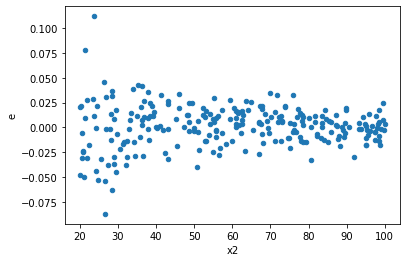

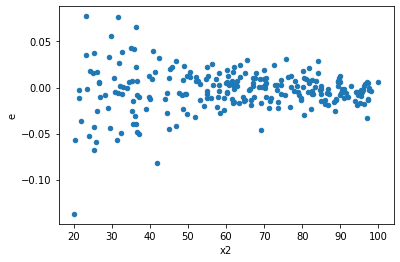

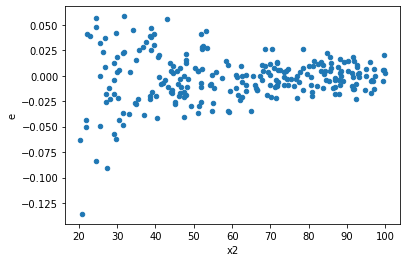

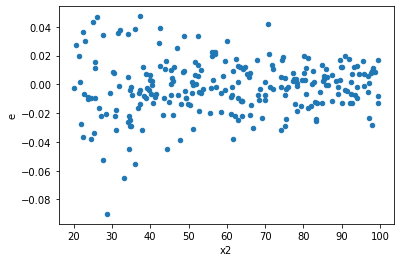

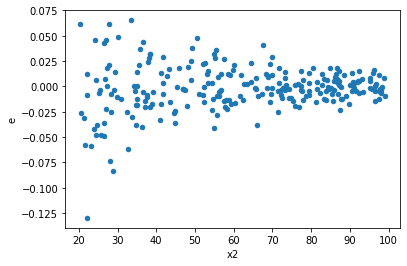

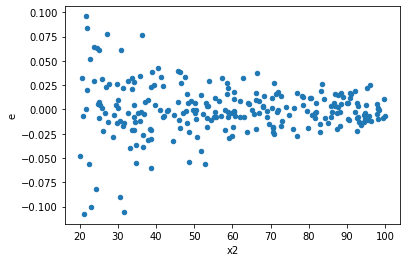

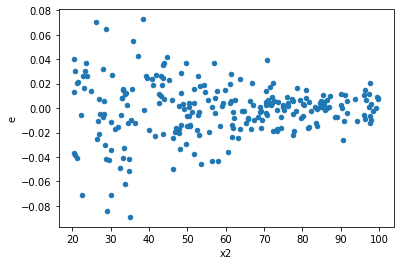

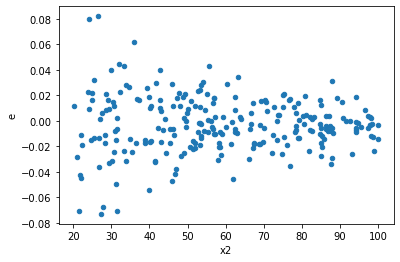

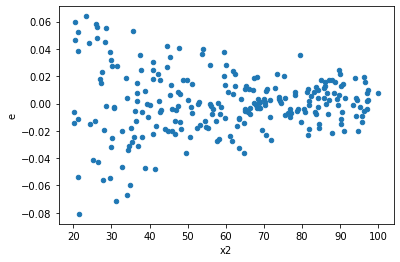

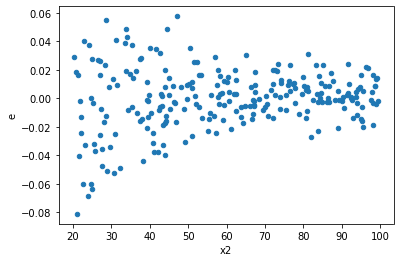

In [26]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [27]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [28]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,126.0,118.0,0.02176602741811785,0.08851728571491427,0.00017274624935014165,0.000750146489109443,4.342476273328292,1.2878587085651816e-14,0.9999999999999936,6.439293542825908e-15,Reject001=0 : Heteroscedasticity
1.0,115.0,129.0,0.06079949483287415,0.06971773222479731,0.0005286912594162969,0.0005404475366263357,1.0222365643476277,0.9009126211883534,0.5495436894058233,0.4504563105941767,Reject001=1 : Homoscedasticity
3.0,126.0,118.0,0.0333484887660536,0.05702547263905365,0.00026467054576233013,0.00048326671728011566,1.8259180139904247,0.0010399264475462466,0.9994800367762269,0.0005199632237731233,Reject001=0 : Heteroscedasticity
5.0,124.0,120.0,0.0807469295860834,0.09434250344204194,0.0006511849160168017,0.0007861875286836828,1.2073183965818364,0.3002370273522823,0.8498814863238588,0.15011851367614115,Reject001=1 : Homoscedasticity
7.0,133.0,111.0,0.04247168824263699,0.07428991455717558,0.00031933600182433824,0.0006692785095241044,2.095844207043915,7.22555924295154e-05,0.9999638722037852,3.61277962147577e-05,Reject001=0 : Heteroscedasticity
8.0,117.0,127.0,0.042817014847362625,0.08345773574568008,0.0003659573918578002,0.0006571475255565361,1.7956940894689823,0.001299143809936787,0.9993504280950316,0.0006495719049683935,Reject001=0 : Heteroscedasticity
9.0,117.0,127.0,0.01628985106428783,0.09165339255475302,0.00013922949627596435,0.0007216802563366379,5.183386248171208,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
11.0,122.0,122.0,0.043183307226152025,0.06909262701955861,0.0003539615346405904,0.0005663330083570377,1.5999846111303806,0.009921223173756655,0.9950393884131217,0.004960611586878327,Reject001=0 : Heteroscedasticity
12.0,116.0,128.0,0.03862096525263007,0.0542368655368253,0.0003329393556261213,0.00042372551200644767,1.2726807595623386,0.18308481546783995,0.90845759226608,0.09154240773391997,Reject001=1 : Homoscedasticity


In [29]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,126.0,118.0,0.02176602741811785,0.08851728571491427,0.00017274624935014165,0.000750146489109443,4.342476273328292,1.2878587085651816e-14,Reject001=0 : Heteroscedasticity
1.0,115.0,129.0,0.06079949483287415,0.06971773222479731,0.0005286912594162969,0.0005404475366263357,1.0222365643476277,0.9009126211883534,Reject001=1 : Homoscedasticity
2.0,118.0,126.0,0.0776249716703368,0.053247216007706835,0.0006578387429689559,0.00042259695244211776,0.6424020429913484,0.01551542083577784,Reject001=1 : Homoscedasticity
3.0,126.0,118.0,0.0333484887660536,0.05702547263905365,0.00026467054576233013,0.00048326671728011566,1.8259180139904247,0.0010399264475462466,Reject001=0 : Heteroscedasticity
4.0,119.0,125.0,0.10693909331732883,0.016426770146510082,0.0008986478430027632,0.00013141416117208064,0.14623543827020188,6.986708701860594e-23,Reject001=0 : Heteroscedasticity
5.0,124.0,120.0,0.0807469295860834,0.09434250344204194,0.0006511849160168017,0.0007861875286836828,1.2073183965818364,0.3002370273522823,Reject001=1 : Homoscedasticity
6.0,115.0,129.0,0.062314475787685404,0.06446127047388486,0.0005418650068494383,0.0004996997711153865,0.9221849811280253,0.6585917012670724,Reject001=1 : Homoscedasticity
7.0,133.0,111.0,0.04247168824263699,0.07428991455717558,0.00031933600182433824,0.0006692785095241044,2.095844207043915,7.22555924295154e-05,Reject001=0 : Heteroscedasticity
8.0,117.0,127.0,0.042817014847362625,0.08345773574568008,0.0003659573918578002,0.0006571475255565361,1.7956940894689823,0.001299143809936787,Reject001=0 : Heteroscedasticity


In [30]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      503
Reject001=0 : Heteroscedasticity    497
Name: Result_test, dtype: int64